Purpose of this notebook: 
* compute the offsets from the different summary stat methods

The files that are saved: 
* 'df_mbp_uber.h5'


In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
from __future__ import print_function
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import compute_distance as compDist
import plot_cred_int as plotCI
import get_KDE

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
data_path = "../../data/test_results/"

# read in files 

want to read in the second half of the projections for the DM data

In [9]:
clstNo = 43
date_stamps = ['06_17_16', '06_21_16']

main_FOF_h5 = h5py.File(
        "../../data/" +
        "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135" +
        ".hdf5", "r")

# this has all the info 
star_no_dens_fhats = \
    h5py.File(data_path + 
              "stars_fhat_clst_no_density_43_06_25_16.h5", 'r')
    
uber_df['clstNo'] = uber_df.index

# figure out how many projections we did 

In [156]:
summary_stat_keys = ['BCG', 'centroid', "shrink_cent"]

The following takes quite a long time because it has to compute the following dataframe entries:

## projection dependent df 
This matches the luminosity KDE peaks and the DM peaks 

| ClstNo | kernel_width | $\Delta s_{BCG}$ | $\Delta s_{KDE}$ | $\zeta$ | $\Delta s_{SA}$ | $\Delta s_{C}$ | total_peaks_dens | no_gal_peaks | DM_x_peak | DM_y_peak | 

In [192]:
uber_df_list = []
for date_stamp in date_stamps:
    
    DM_fhats = \
        h5py.File(data_path +
              "DM_fhat_clst{0}_{1}.h5".format(
                clstNo, date_stamp), 'r')
    star_fhats = \
        h5py.File(data_path +
              "stars_fhat_clst{0}_{1}.h5".format(
                clstNo, date_stamp), 'r')
    
    uber_df_list.append(
        compDist.convert_result_fhat_to_proj_uber_df(
        star_fhats, DM_fhats))
    
    star_fhats.close()
    DM_fhats.close()

In [5]:
uber_df_file = '../../data/spheric_proj_uber_df.h5'

In [6]:
uber_df = pd.read_hdf(uber_df_file, 'df')

Read from the `star_fhat_no_dens` file 

In [10]:
star_paths = compDist.retrieve_cluster_path(star_no_dens_fhats)

In [20]:
DM_keys = ['matched_DM_peak_x', 'matched_DM_peak_y', 'projection', 'clstNo']

In [91]:
gpby = uber_df.groupby(['bin_width', 'peak_id'])

only match the dominant peak 

In [92]:
uber_df_25 = gpby.get_group((25., 0))

In [98]:
no_dens_df = compDist.compute_dist_between_matched_DM_peak_and_no_dens_peak(
    star_no_dens_fhats, uber_df_25
)

In [107]:
no_dens_df.to_hdf('../../data/no_dens_dist_df.h5', 'df')

(-1500, 1500)

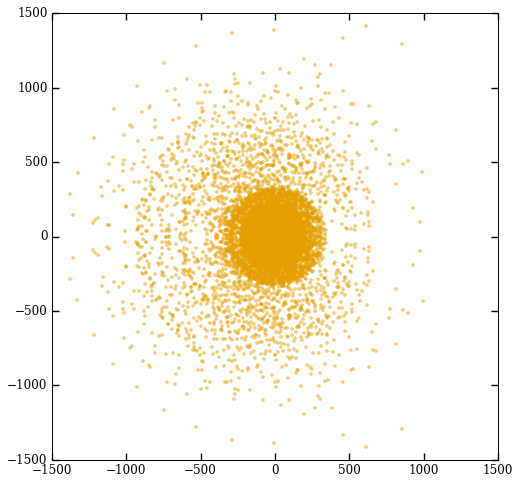

In [106]:
plt.axes().set_aspect('equal')
plt.plot(no_dens_df['Delta_no_peak_x'], 
         no_dens_df['Delta_no_peak_y'], '.', alpha=0.5)
plt.xlim(-1500, 1500)

{'loc': -0.97733373479515429,
 'low68': -87.026240561098348,
 'low95': -332.13937611166739,
 'up68': 80.951460889582904,
 'up95': 198.28747304749277}

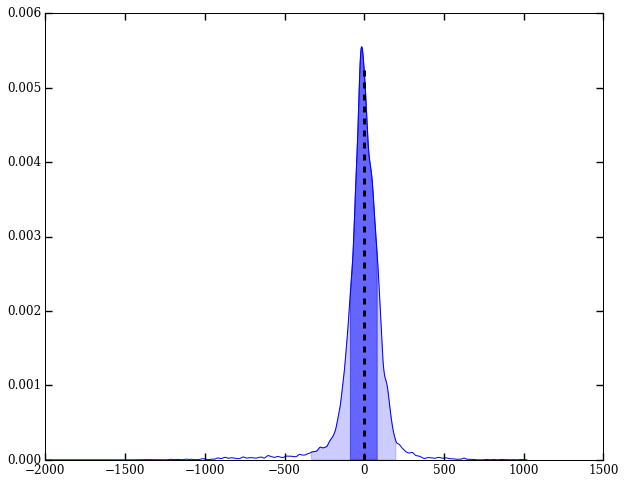

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
plotCI.CI_loc_plot(no_dens_df['Delta_no_peak_x'], ax)

{'loc': -0.029626445967822889,
 'low68': -83.640437758305552,
 'low95': -302.60736196858261,
 'up68': 83.579476004048047,
 'up95': 302.23812015208227}

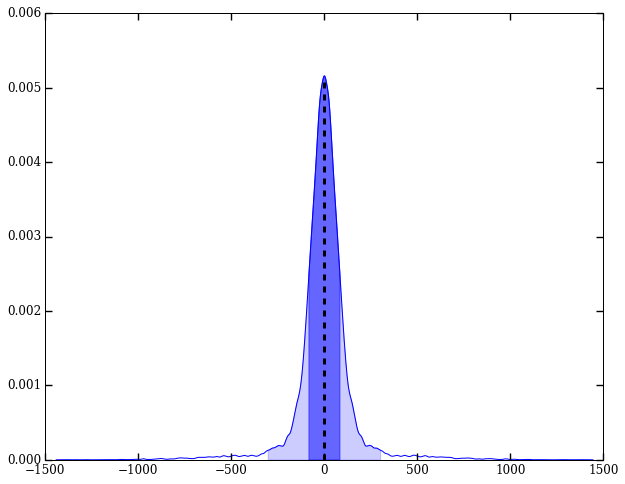

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
plotCI.CI_loc_plot(no_dens_df['Delta_no_peak_y'], ax)

(0, 400)

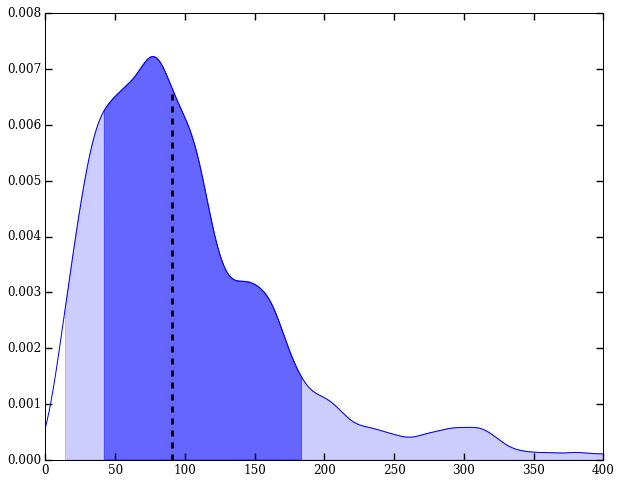

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
plotCI.CI_loc_plot(no_dens_df['no_dens_dist'], ax)
ax.set_xlim(0, 400)

# get the number density peaks 

there are twice as many projections for `no_dens_star_paths` 
because I made sure duplicate projections were computed 

In [209]:
no_dens_star_paths = compDist.retrieve_cluster_path(star_no_dens_fhats)

In [210]:
no_dens_df_list = [pd.DataFrame({ # only retrieve the dominant peak 
                   'peaks_xcoords': star_no_dens_fhats[star_path]['peaks_xcoords'][:1],
                   'peaks_ycoords': star_no_dens_fhats[star_path]['peaks_ycoords'][:1]
                }, index=[int(star_path.split('/')[0])])
               for star_path in no_dens_star_paths]
df_no_dens = pd.concat(no_dens_df_list)
df_no_dens.columns = ['no_dens_x_coords', 'no_dens_y_coords']